(442, 10) (442,)


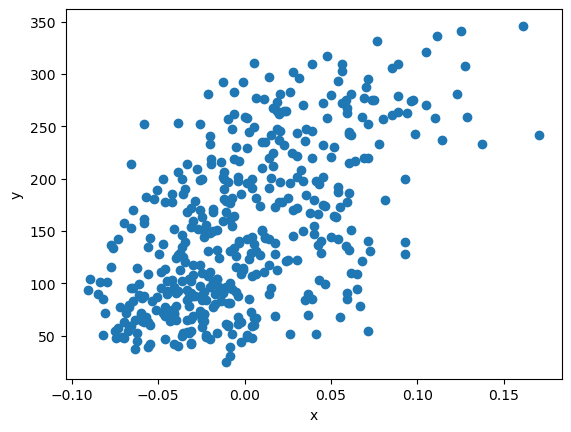

In [1]:
from sklearn.datasets import load_diabetes
diabetes = load_diabetes()

print(diabetes.data.shape, diabetes.target.shape)

diabetes.data[0:3]

diabetes.target[:3] # 당수치

import matplotlib.pyplot as plt
plt.scatter(diabetes.data[:, 2], diabetes.target)
plt.xlabel('x') # bmi
plt.ylabel('y') # 당수치
plt.show()

X = diabetes.data[:, 2]
y = diabetes.target

In [2]:
class Model:
    def __init__(self):
        self.w = 1.0 # 가중치 초기화
        self.b = 1.0 # 편향 초기화

    def forward(self, x):
        y_hat = x * self.w + self.b
        return y_hat
    
    def backward(self, x, err):
        w_grad = x * err
        b_grad = 1 * err
        return w_grad, b_grad
    
    def fit(self, x, y, epochs=100):
        for i in range(epochs): # epoch 만큼 반복
            for x_i, y_i in zip(x, y): # 모든 샘플 반복
                y_hat = self.forward(x_i) # 순전파
                # 오차 계산(실제값 - 예측값)
                err = -(y_i - y_hat)

                # 역전파
                w_grad, b_grad = self.backward(x_i, err)
                self.w -= w_grad # 가중치 수정
                self.b -= b_grad # 절편 수정

model = Model()
model.fit(X, y)

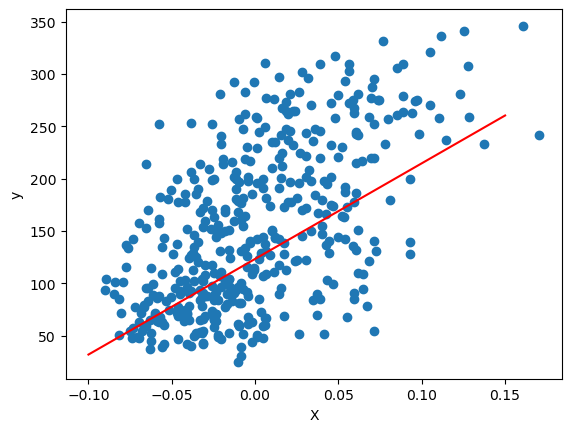

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.scatter(X, y)
pt1 = (-0.1, -0.1 * model.w + model.b)
pt2 = (0.15, 0.15 * model.w + model.b)
plt.plot([pt1[0], pt2[0]], [pt1[1], pt2[1]], c='r') # 회귀선
plt.xlabel('X')
plt.ylabel('y')
plt.show()

[[0.10667615 0.11473686 0.13221275 0.16895435 0.2414415  0.36803037
  0.54814068 0.74116003 0.89223209 0.97836824]
 [0.11473686 0.13221275 0.16895435 0.2414415  0.36803037 0.54814068
  0.74116003 0.89223209 0.97836824 1.00514825]]


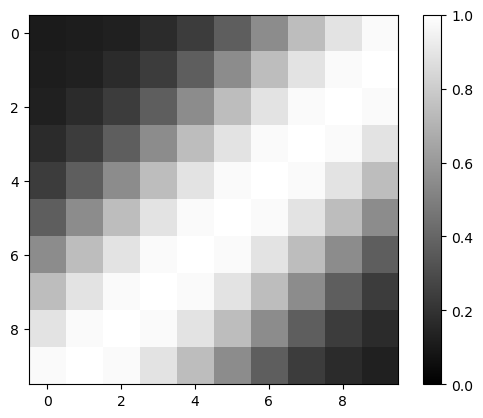

In [5]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt

# -1 ~ 1 0.2 간격의 10개의 리스트
x = np.arange(-1.0, 1.0, 0.2)
y = np.arange(-1.0, 1.0, 0.2)

# 출력을 저장하는 10X10 그리드
z = np.zeros((10,10))

# 가중치
w_im = np.array([[4.0,4.0], [4.0,4.0]]) #hidden layer에 사용할 가중치 행렬
w_mo = np.array([[1.0],[-1.0]]) #output layer에 사용할 가중치 행렬

# 편향
b_im = np.array([3.0,-3.0]) # 은닉층
b_mo = np.array([0.1]) # 출력층

# 은닉층
def hidden_layer(x, w, b):
    u = np.dot(x, w) + b # 행렬곱셈
    return 1/(1+np.exp(-u)) # 활성화함수(시그모이드 함수)

# 출력층
def output_layer(x, w, b):
    u = np.dot(x, w) + b
    return u # 활성화함수(항등함수)

# 그리드맵의 각 그리드별 신경망 연산
for i in range(10):
    for j in range(10):

        # 순전파
        inp = np.array([x[i], y[j]]) # 입력층
        hid = hidden_layer(inp, w_im, b_im) # 은닉층
        out = output_layer(hid, w_mo, b_mo) # 출력층

        # 그리드맵에 신경망 출력 값 저장
        z[j][i] = out[0]

print(z[:2])
# 그리드맵으로 표시
plt.imshow(z, "gray", vmin = 0.0, vmax = 1.0)
plt.colorbar()
plt.show()